In [1]:
import dicom
import os
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from qstatistic.qstatistic import qSigmoid

In [2]:
# Load all images directories from a folder to a list.
def loadDirectories(PathDicom="./images/", PathXml="./xml/"):
    lstFile = []
    for dirDicomName, subdirDicomList, fileDicomList in os.walk(PathDicom):
        for filenameDicom in fileDicomList:
            dicom_name = filenameDicom.split('.')[0]
            dicom_ext = filenameDicom.split('.')[1]
            for dirXmlName, subdirXmlList, fileXmlList in os.walk(PathXml):
                for filenameXml in fileXmlList:
                    xml_name = filenameXml.split('.')[0]
                    xml_ext = filenameXml.split('.')[1]

                    if dicom_ext.lower() == 'dcm' and xml_ext.lower() == 'xml' and \
                            dicom_name.split('_')[0] == xml_name:
                        lstFile.append({
                            'dicom': os.path.join(dirDicomName,filenameDicom),
                            'xml': os.path.join(dirXmlName,filenameXml)
                        })

    return lstFile

In [3]:
def normalize(v):
    norm=np.linalg.norm(v)
    if norm==0: 
       return v
    return v/norm

In [4]:
# Load all directories
files_dir = loadDirectories()
idx_test = 1

In [8]:
from lxml import etree

doc = etree.parse(files_dir[idx_test].get('xml'))

rois = doc.find('dict').find('array').find('dict').find('array').findall('dict')

for r in rois:
    roi_type = r.findall('string')[-1]
    roi_points = r.findall('array')[-1].findall('string')
    if roi_type.text == 'Mass':
        print('Type: {}'.format(roi_type.text))
        for p in roi_points:
            print('   Point: {}'.format(p.text))

Type: Mass
   Point: (391.191010, 1654.939941)
   Point: (395.467987, 1660.290039)
   Point: (397.605988, 1665.630005)
   Point: (398.674988, 1672.050049)
   Point: (397.605988, 1679.530029)
   Point: (396.536987, 1685.949951)
   Point: (395.467987, 1692.359985)
   Point: (395.467987, 1697.709961)
   Point: (395.467987, 1704.119995)
   Point: (394.398010, 1709.469971)
   Point: (395.467987, 1715.890015)
   Point: (400.813995, 1720.160034)
   Point: (406.160004, 1724.439941)
   Point: (410.436005, 1729.780029)
   Point: (415.782013, 1732.989990)
   Point: (421.128998, 1735.130005)
   Point: (427.544006, 1741.550049)
   Point: (432.890015, 1746.890015)
   Point: (439.304993, 1749.030029)
   Point: (444.651001, 1752.239990)
   Point: (448.928009, 1757.579956)
   Point: (455.342987, 1761.859985)
   Point: (460.688995, 1766.140015)
   Point: (467.104004, 1770.410034)
   Point: (472.450012, 1772.550049)
   Point: (477.795990, 1774.689941)
   Point: (484.212006, 1778.969971)
   Point: (487.41

In [6]:
# Make qSigmoid with one image from list.
image_full = dicom.read_file(files_dir[idx_test].get('dicom'))
image = image_full.pixel_array

lin, col = image.shape

L = np.max(image)
B = 1750
a = 130
q = 0.35

result = qSigmoid(L=L, I=image, B=B, a=a, q=q).calc()

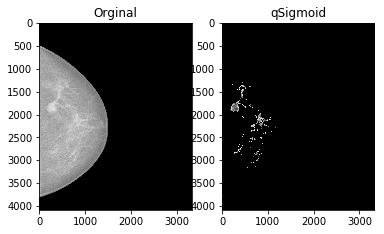

In [11]:
fig = plt.figure()

a = fig.add_subplot(1,2,1)
img_plot = plt.imshow(image, cmap=plt.cm.gray)
a.set_title('Orginal')
a = fig.add_subplot(1,2,2)
img_plot = plt.imshow(result, cmap=plt.cm.gray)
a.set_title('qSigmoid')
plt.show()